# The Distribution of Wealth and the MPC

This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import (
    get_param_count,
    get_spec_name,
    get_target_ky_and_find_lorenz_distance,
    set_up_economy,
    estimate
)

from HARK.distribution import (
    expected
)

from code.estimation_dist_bounds import estimate_r_upper_given_r_lower

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "uniform"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = True

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = False

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}

In [5]:
# Here are some checks to make sure R_cusp will be defined properly
spec_name = get_spec_name(options)
param_count = get_param_count(options)
economy = set_up_economy(options, parameters, param_count)

print(economy.agents[0].Rfree)
print(economy.agents[0].DiscFac)
print(economy.agents[0].CRRA)
print(economy.agents[0].PermGroFac[0])

# Defined previously in ConsIndShockModel, but needs to be hard-coded here for now
economy.agents[0].Ex_PermShkInv = expected(lambda x: 1 / x, economy.agents[0].PermShkDstn[0])[0]

print(economy.agents[0].Ex_PermShkInv)
#print(economy.agents[0].LivPrb[0]) # this one is needed for the life-cycle version of the model

R_cusp_check = ((economy.agents[0].PermGroFac[0] / economy.agents[0].Ex_PermShkInv) ** economy.agents[0].CRRA ) * (1/economy.agents[0].DiscFac)
print(R_cusp_check)

# This is to check if B-dist violates GIC raw when trying to match the capital to output ratio
Beta_cusp_check = ((economy.agents[0].PermGroFac[0] / economy.agents[0].Ex_PermShkInv) ** economy.agents[0].CRRA ) * (1/economy.agents[0].Rfree)
print(Beta_cusp_check)


1.0163522012578616
0.97
1.0
1.0
1.0032663974964733
1.0275713784734533
0.9807075105319348


GPFRaw                 = 0.976162 
GPFNrm                 = 0.979350 
GPFAggLivPrb           = 0.970061 
Thorn = APF            = 0.976162 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.990453 
DiscFacGPFAggLivPrbMax = 0.999938 


Beginning an estimation with the specification name PYUnifrratePointIndNetWorth...
1.0063522012578616


GPFRaw                 = 1.082862 
GPFNrm                 = 1.086399 
GPFAggLivPrb           = 1.076094 
Thorn = APF            = 1.082862 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.892858 
DiscFacGPFAggLivPrbMax = 0.901408 


get_KY_ratio_difference tried center = 1.0063522012578616 and got -9.6345541430904
1.1163522012578617


GPFRaw                 = 0.976162 
GPFNrm                 = 0.979350 
GPFAggLivPrb           = 0.970061 
Thorn = APF            = 0.976162 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.990453 
DiscFacGPFAggLivPrbMax = 0.999938 


get_KY_ratio_difference tried center = 1.1163522012578617 and got 395459849006.90906
1.0063522012605415


GPFRaw                 = 1.002837 
GPFNrm                 = 1.006112 
GPFAggLivPrb           = 0.996569 
Thorn = APF            = 1.002837 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.964107 
DiscFacGPFAggLivPrbMax = 0.973340 


get_KY_ratio_difference tried center = 1.0063522012605415 and got -9.634554143057901
1.0338522964283747


GPFRaw                 = 1.002837 
GPFNrm                 = 1.006112 
GPFAggLivPrb           = 0.996569 
Thorn = APF            = 1.002837 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.964107 
DiscFacGPFAggLivPrbMax = 0.973340 


get_KY_ratio_difference tried center = 1.0338522964283747 and got -7.409844495501105
1.0338522964314665


GPFRaw                 = 1.042849 
GPFNrm                 = 1.046256 
GPFAggLivPrb           = 1.036331 
Thorn = APF            = 1.042849 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.927116 
DiscFacGPFAggLivPrbMax = 0.935994 


get_KY_ratio_difference tried center = 1.0338522964314665 and got -7.409844493169697
1.0751022488446642


GPFRaw                 = 1.012368 
GPFNrm                 = 1.015675 
GPFAggLivPrb           = 1.006041 
Thorn = APF            = 1.012368 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.955030 
DiscFacGPFAggLivPrbMax = 0.964176 


get_KY_ratio_difference tried center = 1.0751022488446642 and got 400052.8790925666
1.0436785041428347


GPFRaw                 = 1.006193 
GPFNrm                 = 1.009479 
GPFAggLivPrb           = 0.999904 
Thorn = APF            = 1.006193 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960892 
DiscFacGPFAggLivPrbMax = 0.970093 


get_KY_ratio_difference tried center = 1.0436785041428347 and got 34.681553881907305
1.0373119425306532


GPFRaw                 = 1.006997 
GPFNrm                 = 1.010286 
GPFAggLivPrb           = 1.000703 
Thorn = APF            = 1.006997 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960124 
DiscFacGPFAggLivPrbMax = 0.969319 


get_KY_ratio_difference tried center = 1.0373119425306532 and got -1.591402273515488
1.0381407730652257


GPFRaw                 = 1.006595 
GPFNrm                 = 1.009883 
GPFAggLivPrb           = 1.000303 
Thorn = APF            = 1.006595 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960508 
DiscFacGPFAggLivPrbMax = 0.969706 


get_KY_ratio_difference tried center = 1.0381407730652257 and got 0.8648052602027949
1.0377263577979394


GPFRaw                 = 1.006730 
GPFNrm                 = 1.010018 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006730 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960379 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.0377263577979394 and got -0.41731496892270314
1.037865495265322


GPFRaw                 = 1.006729 
GPFNrm                 = 1.010017 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006729 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960380 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.037865495265322 and got 0.0008749449132050557
1.0378649130531963


GPFRaw                 = 1.006729 
GPFNrm                 = 1.010018 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006729 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960379 
DiscFacGPFAggLivPrbMax = 0.969576 


get_KY_ratio_difference tried center = 1.0378649130531963 and got -0.000962285411659991
1.037865204159259
Estimate is center=1.037865204159259, spread=0.0, took 60.83301615715027 seconds.
Running in interactive shell (Jupyter notebook or spyder)


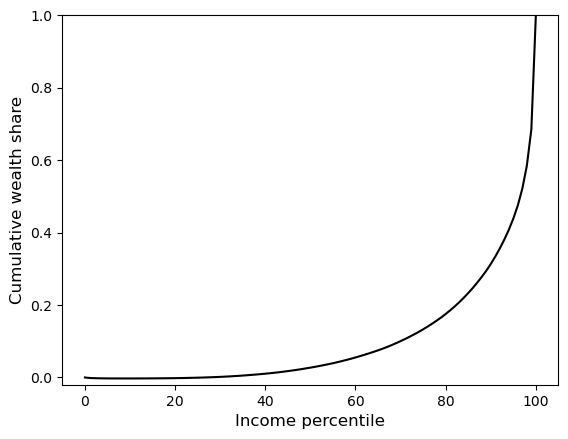

GPFRaw                 = 1.006729 
GPFNrm                 = 1.010018 
GPFAggLivPrb           = 1.000437 
Thorn = APF            = 1.006729 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 0.960379 
DiscFacGPFAggLivPrbMax = 0.969576 


Estimate is center=1.037865204159259, spread=0.0
Lorenz distance is 39.8217250255979
Average MPC for all consumers is 0.168
Average MPC in the top percentile of W/Y is 0.137
Average MPC in the top decile of W/Y is 0.139
Average MPC in the top quintile of W/Y is 0.139
Average MPC in the second quintile of W/Y is 0.141
Average MPC in the middle quintile of W/Y is 0.142
Average MPC in the fourth quintile of W/Y is 0.145
Average MPC in the bottom quintile of W/Y is 0.272
Average MPC in the top percentile of y is 0.143
Average MPC in the top decile of y is 0.146
Average MPC in the top quintile of y is 0.153
Average MPC in the second quintile of y is 0.186
Average MPC in the middle quintile of y is 0.188
Average MPC in the fourth quintile of y is 0.151
Average MPC in the bottom quintile of y is 0.161
Average MPC for the employed is 0.165
Average MPC for the unemployed is 0.200
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
69.689% are in the bottom wealth q

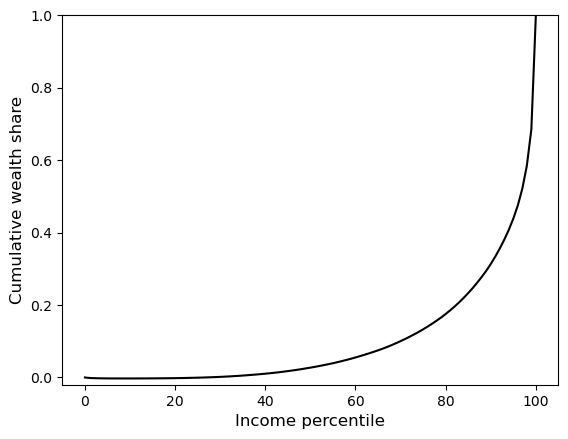

Estimate is center=1.037865204159259, spread=0.0
Lorenz distance is 39.8217250255979
Average MPC for all consumers is 0.168
Average MPC in the top percentile of W/Y is 0.137
Average MPC in the top decile of W/Y is 0.139
Average MPC in the top quintile of W/Y is 0.139
Average MPC in the second quintile of W/Y is 0.141
Average MPC in the middle quintile of W/Y is 0.142
Average MPC in the fourth quintile of W/Y is 0.145
Average MPC in the bottom quintile of W/Y is 0.272
Average MPC in the top percentile of y is 0.143
Average MPC in the top decile of y is 0.146
Average MPC in the top quintile of y is 0.153
Average MPC in the second quintile of y is 0.186
Average MPC in the middle quintile of y is 0.188
Average MPC in the fourth quintile of y is 0.151
Average MPC in the bottom quintile of y is 0.161
Average MPC for the employed is 0.165
Average MPC for the unemployed is 0.200
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
69.689% are in the bottom wealth q

In [6]:
EstimationEconomy_bounds = estimate_r_upper_given_r_lower(options, parameters)

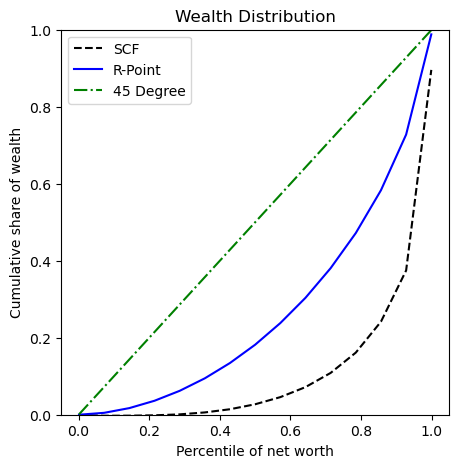

In [7]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy_bounds.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Return Preference Heterogeneneity

The analog to the CSTW (link to paper/notebook) work is referred to as the $\Rfree$-Dist model. Here, households no longer have the same rate of return to their assets. Instead, the model assumes that, for some dispersion $\nabla$, the rate of return to assets are distributed uniformly in the population between
$\grave{\Rfree}-\nabla$ and $\grave{\Rfree}+\nabla$. 

From here, using simulations, we search for the values of $\grave{\Rfree}$ and
$\nabla$ for which the model best matches the fraction of net worth held by the top $20$, $40$, $60$, and $80$ percent of the population, while at the same time matching
the aggregate capital-to-output ratio from the perfect foresight
model. For a description of the optimization problem that describes this structural estimation procedure, see (Link to the CSTW notebook). 

The solution to this problem assuming ex-ante heterogeneity in the rate of return is $\{\grave{\Rfree}, \nabla\}=\{1.03218, 0.01332\}$, so that the rate of return to assets is evenly spread roughly between 1.0189 and 1.0455.

Thus, much like the model with time preference heterogeneity, the introduction of even such a relatively modest amount of heterogeneity in the rate of return to assets sharply improves the model's fit to the targeted
proportions of wealth holdings, bringing it reasonably in line with the data. 

In fact, the fit here is better than the analogous, estimation under the simplest specification of the model with heterogeneous time preferences: the *Lorenz distance* in that model is $4.75$, while here it is $2.07$.


In [8]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = False  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

In [9]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


Beginning an estimation with the specification name PYUnifrrateDistIndNetWorth...
0.4378597684322482
0.5285846315155105
0.6193094945987728
0.7100343576820352
0.8007592207652975
0.8914840838485598
0.982208946931822


GPFRaw                 = 0.952743 
GPFNrm                 = 0.955855 
GPFAggLivPrb           = 0.946788 
Thorn = APF            = 0.952743 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.014799 
DiscFacGPFAggLivPrbMax = 1.024517 
GPFRaw                 = 0.424724 
GPFNrm                 = 0.426111 
GPFAggLivPrb           = 0.422069 
Thorn = APF            = 0.424724 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.276401 
DiscFacGPFAggLivPrbMax = 2.298200 
GPFRaw                 = 0.688733 
GPFNrm                 = 0.690983 
GPFAggLivPrb           = 0.684429 
Thorn = APF            = 0.688733 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7100343576820352 and got -10.150963311987105
find_lorenz_distance_at_target_KY tried spread = 0.31753702079141816 and got 4.439181472885911
0.6631095563607374
0.7191806059165399
0.7752516554723423
0.8313227050281448
0.8873937545839472
0.9434648041397496
0.9995358536955521


GPFRaw                 = 0.643216 
GPFNrm                 = 0.645317 
GPFAggLivPrb           = 0.639196 
Thorn = APF            = 0.643216 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.503137 
DiscFacGPFAggLivPrbMax = 1.517531 
GPFRaw                 = 0.697605 
GPFNrm                 = 0.699884 
GPFAggLivPrb           = 0.693245 
Thorn = APF            = 0.697605 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.385944 
DiscFacGPFAggLivPrbMax = 1.399216 
GPFRaw                 = 0.751994 
GPFNrm                 = 0.754450 
GPFAggLivPrb           = 0.747294 
Thorn = APF            = 0.751994 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.8313227050281448 and got -10.07667966810389
find_lorenz_distance_at_target_KY tried spread = 0.1962486734453085 and got 14.974815655924122
0.2986477435337359
0.41078984121676937
0.5229319388998028
0.6350740365828362
0.7472161342658696
0.859358231948903
0.9715003296319366


GPFRaw                 = 0.289688 
GPFNrm                 = 0.290635 
GPFAggLivPrb           = 0.287878 
Thorn = APF            = 0.289688 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 3.337525 
DiscFacGPFAggLivPrbMax = 3.369486 
GPFRaw                 = 0.398466 
GPFNrm                 = 0.399768 
GPFAggLivPrb           = 0.395976 
Thorn = APF            = 0.398466 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.426409 
DiscFacGPFAggLivPrbMax = 2.449645 
GPFRaw                 = 0.507244 
GPFNrm                 = 0.508901 
GPFAggLivPrb           = 0.504074 
Thorn = APF            = 0.507244 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.6350740365828362 and got -10.174280037322788
find_lorenz_distance_at_target_KY tried spread = 0.392497341890617 and got 8.111998135425898
0.44592123820006846
0.5354058751652047
0.6248905121303407
0.7143751490954768
0.8038597860606129
0.893344423025749
0.9828290599908852


GPFRaw                 = 0.432544 
GPFNrm                 = 0.433956 
GPFAggLivPrb           = 0.429840 
Thorn = APF            = 0.432544 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.235247 
DiscFacGPFAggLivPrbMax = 2.256653 
GPFRaw                 = 0.519344 
GPFNrm                 = 0.521040 
GPFAggLivPrb           = 0.516098 
Thorn = APF            = 0.519344 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.861661 
DiscFacGPFAggLivPrbMax = 1.879489 
GPFRaw                 = 0.606144 
GPFNrm                 = 0.608124 
GPFAggLivPrb           = 0.602355 
Thorn = APF            = 0.606144 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7143751490954768 and got -10.14931438632176
find_lorenz_distance_at_target_KY tried spread = 0.3131962293779764 and got 4.352319185198916
0.5288797937780179
0.6056015760388541
0.6823233582996903
0.7590451405605265
0.8357669228213628
0.9124887050821989
0.9892104873430352


GPFRaw                 = 0.513013 
GPFNrm                 = 0.514689 
GPFAggLivPrb           = 0.509807 
Thorn = APF            = 0.513013 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.884633 
DiscFacGPFAggLivPrbMax = 1.902681 
GPFRaw                 = 0.661854 
GPFNrm                 = 0.664016 
GPFAggLivPrb           = 0.657717 
Thorn = APF            = 0.661854 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.460809 
DiscFacGPFAggLivPrbMax = 1.474798 
GPFRaw                 = 0.587434 
GPFNrm                 = 0.589352 
GPFAggLivPrb           = 0.583762 
Thorn = APF            = 0.587434 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7590451405605265 and got -10.128519929837742
find_lorenz_distance_at_target_KY tried spread = 0.2685262379129267 and got 5.676905532040516
0.4682100559255075
0.5542656440098068
0.6403212320941062
0.7263768201784055
0.8124324082627049
0.8984879963470043
0.9845435844313035


GPFRaw                 = 0.454164 
GPFNrm                 = 0.455647 
GPFAggLivPrb           = 0.451325 
Thorn = APF            = 0.454164 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.128840 
DiscFacGPFAggLivPrbMax = 2.149226 
GPFRaw                 = 0.537638 
GPFNrm                 = 0.539394 
GPFAggLivPrb           = 0.534277 
Thorn = APF            = 0.537638 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.798315 
DiscFacGPFAggLivPrbMax = 1.815536 
GPFRaw                 = 0.621112 
GPFNrm                 = 0.623140 
GPFAggLivPrb           = 0.617230 
Thorn = APF            = 0.621112 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7263768201784055 and got -10.144322730747385
find_lorenz_distance_at_target_KY tried spread = 0.30119455829504765 and got 4.158118105793899
0.49138383369662053
0.5738742252007486
0.6563646167048768
0.7388550082090048
0.8213453997131329
0.9038357912172611
0.9863261827213892


GPFRaw                 = 0.476642 
GPFNrm                 = 0.478199 
GPFAggLivPrb           = 0.473663 
Thorn = APF            = 0.476642 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.028443 
DiscFacGPFAggLivPrbMax = 2.047868 
GPFRaw                 = 0.556658 
GPFNrm                 = 0.558476 
GPFAggLivPrb           = 0.553179 
Thorn = APF            = 0.556658 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.736869 
DiscFacGPFAggLivPrbMax = 1.753501 
GPFRaw                 = 0.636674 
GPFNrm                 = 0.638753 
GPFAggLivPrb           = 0.632694 
Thorn = APF            = 0.636674 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7388550082090048 and got -10.138544185919582
find_lorenz_distance_at_target_KY tried spread = 0.2887163702644484 and got 4.3781745658752
0.47409582133498546
0.5592459070485959
0.6443959927622064
0.7295460784758168
0.8146961641894271
0.8998462499030376
0.984996335616648


GPFRaw                 = 0.459873 
GPFNrm                 = 0.461375 
GPFAggLivPrb           = 0.456999 
Thorn = APF            = 0.459873 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.102411 
DiscFacGPFAggLivPrbMax = 2.122544 
GPFRaw                 = 0.542469 
GPFNrm                 = 0.544240 
GPFAggLivPrb           = 0.539078 
Thorn = APF            = 0.542469 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.782300 
DiscFacGPFAggLivPrbMax = 1.799368 
GPFRaw                 = 0.625064 
GPFNrm                 = 0.627106 
GPFAggLivPrb           = 0.621157 
Thorn = APF            = 0.625064 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7295460784758168 and got -10.142891531695394
find_lorenz_distance_at_target_KY tried spread = 0.2980252999976365 and got 4.155639154679416
0.47587923548723304
0.5607549497928054
0.6456306640983777
0.73050637840395
0.8153820927095224
0.9002578070150947
0.9851335213206671


GPFRaw                 = 0.461603 
GPFNrm                 = 0.463111 
GPFAggLivPrb           = 0.458718 
Thorn = APF            = 0.461603 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.094532 
DiscFacGPFAggLivPrbMax = 2.114590 
GPFRaw                 = 0.543932 
GPFNrm                 = 0.545709 
GPFAggLivPrb           = 0.540533 
Thorn = APF            = 0.543932 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.777504 
DiscFacGPFAggLivPrbMax = 1.794526 
GPFRaw                 = 0.626262 
GPFNrm                 = 0.628307 
GPFAggLivPrb           = 0.622348 
Thorn = APF            = 0.626262 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.73050637840395 and got -10.142448426929752
find_lorenz_distance_at_target_KY tried spread = 0.2970650000695032 and got 4.161803419317504
0.47659801391002554
0.5613631469197837
0.6461282799295418
0.7308934129392999
0.815658545949058
0.900423678958816
0.9851888119685742


GPFRaw                 = 0.462300 
GPFNrm                 = 0.463810 
GPFAggLivPrb           = 0.459411 
Thorn = APF            = 0.462300 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.091373 
DiscFacGPFAggLivPrbMax = 2.111401 
GPFRaw                 = 0.544522 
GPFNrm                 = 0.546301 
GPFAggLivPrb           = 0.541119 
Thorn = APF            = 0.544522 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.775578 
DiscFacGPFAggLivPrbMax = 1.792582 
GPFRaw                 = 0.626744 
GPFNrm                 = 0.628792 
GPFAggLivPrb           = 0.622827 
Thorn = APF            = 0.626744 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7308934129392999 and got -10.142269541033194
find_lorenz_distance_at_target_KY tried spread = 0.2966779655341534 and got 4.165495694751348
0.47617239510737097
0.561003007932922
0.6458336207584732
0.7306642335840243
0.8154948464095755
0.9003254592351266
0.9851560720606777


GPFRaw                 = 0.461887 
GPFNrm                 = 0.463396 
GPFAggLivPrb           = 0.459000 
Thorn = APF            = 0.461887 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093242 
DiscFacGPFAggLivPrbMax = 2.113288 
GPFRaw                 = 0.544173 
GPFNrm                 = 0.545950 
GPFAggLivPrb           = 0.540772 
Thorn = APF            = 0.544173 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776718 
DiscFacGPFAggLivPrbMax = 1.793732 
GPFRaw                 = 0.708744 
GPFNrm                 = 0.711059 
GPFAggLivPrb           = 0.704315 
Thorn = APF            = 0.708744 
PermGroFacAdj          = 0.996744 
GPFRaw                 = 0.626459 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
GPFNrm              

get_KY_ratio_difference tried center = 0.7306642335840243 and got -10.14237549008425
find_lorenz_distance_at_target_KY tried spread = 0.2969071448894289 and got 4.163226127170207
0.47614143675230836
0.5609768124017153
0.6458121880511222
0.7306475637005291
0.815482939349936
0.9003183149993429
0.9851536906487498


GPFRaw                 = 0.461857 
GPFNrm                 = 0.463366 
GPFAggLivPrb           = 0.458971 
Thorn = APF            = 0.461857 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093378 
DiscFacGPFAggLivPrbMax = 2.113425 
GPFRaw                 = 0.544148 
GPFNrm                 = 0.545925 
GPFAggLivPrb           = 0.540747 
Thorn = APF            = 0.544148 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776801 
DiscFacGPFAggLivPrbMax = 1.793816 
GPFRaw                 = 0.626438 
GPFNrm                 = 0.628484 
GPFAggLivPrb           = 0.622523 
Thorn = APF            = 0.626438 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7306475637005291 and got -10.142383193762782
find_lorenz_distance_at_target_KY tried spread = 0.2969238147729242 and got 4.1630704819250495
0.47620335346243375
0.5610292034641291
0.6458550534658244
0.7306809034675197
0.815506753469215
0.9003326034709103
0.9851584534726057


GPFRaw                 = 0.461917 
GPFNrm                 = 0.463426 
GPFAggLivPrb           = 0.459030 
Thorn = APF            = 0.461917 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093106 
DiscFacGPFAggLivPrbMax = 2.113150 
GPFRaw                 = 0.544198 
GPFNrm                 = 0.545976 
GPFAggLivPrb           = 0.540797 
Thorn = APF            = 0.544198 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776635 
DiscFacGPFAggLivPrbMax = 1.793649 
GPFRaw                 = 0.626479 
GPFNrm                 = 0.628526 
GPFAggLivPrb           = 0.622564 
Thorn = APF            = 0.626479 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7306809034675197 and got -10.142367786118767
find_lorenz_distance_at_target_KY tried spread = 0.2968904750059336 and got 4.1633830402660195
0.47617239439308523
0.561003005790065
0.6458336171870447
0.7306642285840244
0.815494839981004
0.9003254513779837
0.9851560627749635


GPFRaw                 = 0.461887 
GPFNrm                 = 0.463396 
GPFAggLivPrb           = 0.459000 
Thorn = APF            = 0.461887 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093242 
DiscFacGPFAggLivPrbMax = 2.113288 
GPFRaw                 = 0.544173 
GPFNrm                 = 0.545950 
GPFAggLivPrb           = 0.540772 
Thorn = APF            = 0.544173 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776718 
DiscFacGPFAggLivPrbMax = 1.793732 
GPFRaw                 = 0.626459 
GPFNrm                 = 0.628505 
GPFAggLivPrb           = 0.622543 
Thorn = APF            = 0.626459 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

Estimate is center=0.7306642285840244, spread=0.2969071398894289, took 191.48554801940918 seconds.
Running in interactive shell (Jupyter notebook or spyder)


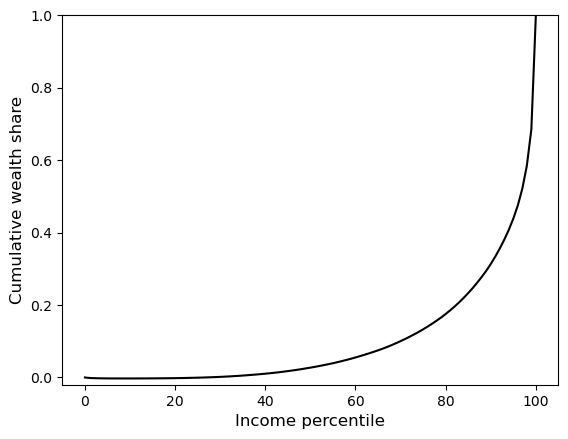

Estimate is center=0.7306642285840244, spread=0.2969071398894289
Lorenz distance is 4.163226307948285
Average MPC for all consumers is 0.949
Average MPC in the top percentile of W/Y is 0.591
Average MPC in the top decile of W/Y is 0.729
Average MPC in the top quintile of W/Y is 0.804
Average MPC in the second quintile of W/Y is 0.953
Average MPC in the middle quintile of W/Y is 0.988
Average MPC in the fourth quintile of W/Y is 1.000
Average MPC in the bottom quintile of W/Y is 1.000
Average MPC in the top percentile of y is 0.940
Average MPC in the top decile of y is 0.936
Average MPC in the top quintile of y is 0.936
Average MPC in the second quintile of y is 0.943
Average MPC in the middle quintile of y is 0.949
Average MPC in the fourth quintile of y is 0.951
Average MPC in the bottom quintile of y is 0.966
Average MPC for the employed is 0.946
Average MPC for the unemployed is 0.997
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
nan% are in the b

GPFRaw                 = 0.593611 
GPFNrm                 = 0.595550 
GPFAggLivPrb           = 0.589901 
Thorn = APF            = 0.593611 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.628746 
DiscFacGPFAggLivPrbMax = 1.644343 
GPFRaw                 = 0.625042 
GPFNrm                 = 0.627083 
GPFAggLivPrb           = 0.621135 
Thorn = APF            = 0.625042 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.546844 
GPFRaw                 = 0.562181 
DiscFacGPFAggLivPrbMax = 1.561657 
GPFNrm                 = 0.564017 
GPFAggLivPrb           = 0.558667 
Thorn = APF            = 0.562181 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.5471655246298377 and got -10.255332638810831
find_lorenz_distance_at_target_KY tried spread = -0.11340843593524214 and got 18.400516928296103
0.7745403960380852
0.7221121949083176
0.6696839937785499
0.6172557926487823
0.5648275915190146
0.512399390389247
0.4599711892594794


GPFRaw                 = 0.751304 
GPFNrm                 = 0.753758 
GPFAggLivPrb           = 0.746609 
Thorn = APF            = 0.751304 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.286885 
DiscFacGPFAggLivPrbMax = 1.299208 
GPFRaw                 = 0.700449 
GPFNrm                 = 0.702737 
GPFAggLivPrb           = 0.696071 
Thorn = APF            = 0.700449 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.380318 
DiscFacGPFAggLivPrbMax = 1.393536 
GPFRaw                 = 0.649593 
GPFNrm                 = 0.651715 
GPFAggLivPrb           = 0.645534 
Thorn = APF            = 0.649593 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.6172557926487823 and got -10.238764260614035
find_lorenz_distance_at_target_KY tried spread = -0.18349870395418671 and got 13.85775022705227
0.854988422168352
0.7901836016339279
0.7253787810995038
0.6605739605650798
0.5957691400306557
0.5309643194962317
0.46615949896180753


GPFRaw                 = 0.829339 
GPFNrm                 = 0.832048 
GPFAggLivPrb           = 0.824155 
Thorn = APF            = 0.829339 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.165799 
DiscFacGPFAggLivPrbMax = 1.176962 
GPFRaw                 = 0.766478 
GPFNrm                 = 0.768982 
GPFAggLivPrb           = 0.761688 
Thorn = APF            = 0.766478 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.261408 
DiscFacGPFAggLivPrbMax = 1.273488 
GPFRaw                 = 0.703617 
GPFNrm                 = 0.705916 
GPFAggLivPrb           = 0.699220 
Thorn = APF            = 0.703617 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.6605739605650798 and got -10.217728624722534
find_lorenz_distance_at_target_KY tried spread = -0.22681687187048427 and got 7.01368169930462
0.9047080366446966
0.8322540446523734
0.7598000526600501
0.6873460606677269
0.6148920686754036
0.5424380766830803
0.46998408469075714


GPFRaw                 = 0.877567 
GPFNrm                 = 0.880433 
GPFAggLivPrb           = 0.872082 
Thorn = APF            = 0.877567 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.101730 
DiscFacGPFAggLivPrbMax = 1.112281 
GPFRaw                 = 0.807286 
GPFNrm                 = 0.809923 
GPFAggLivPrb           = 0.802241 
Thorn = APF            = 0.807286 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.197644 
DiscFacGPFAggLivPrbMax = 1.209113 
GPFRaw                 = 0.737006 
GPFNrm                 = 0.739413 
GPFAggLivPrb           = 0.732400 
Thorn = APF            = 0.737006 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.6873460606677269 and got -10.197908764480676
find_lorenz_distance_at_target_KY tried spread = -0.25358897197313135 and got 5.264870767916228
0.939682698544445
0.8618479893367759
0.7840132801291066
0.7061785709214375
0.6283438617137684
0.5505091525060992
0.4726744432984301


GPFRaw                 = 0.911492 
GPFNrm                 = 0.914470 
GPFAggLivPrb           = 0.905795 
Thorn = APF            = 0.911492 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.060724 
DiscFacGPFAggLivPrbMax = 1.070882 
GPFRaw                 = 0.835993 
GPFNrm                 = 0.838723 
GPFAggLivPrb           = 0.830768 
Thorn = APF            = 0.835993 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.156520 
DiscFacGPFAggLivPrbMax = 1.167595 
GPFRaw                 = 0.760493 
GPFNrm                 = 0.762977 
GPFAggLivPrb           = 0.755740 
Thorn = APF            = 0.760493 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7061785709214375 and got -10.17908841491786
find_lorenz_distance_at_target_KY tried spread = -0.27242148222684204 and got 4.656478214436435
0.9570519780976994
0.8765450720356833
0.7960381659736674
0.7155312599116515
0.6350243538496355
0.5545174477876196
0.4740105417256036


GPFRaw                 = 0.928340 
GPFNrm                 = 0.931373 
GPFAggLivPrb           = 0.922538 
Thorn = APF            = 0.928340 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.041473 
DiscFacGPFAggLivPrbMax = 1.051447 
GPFRaw                 = 0.850249 
GPFNrm                 = 0.853026 
GPFAggLivPrb           = 0.844935 
Thorn = APF            = 0.850249 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.137128 
DiscFacGPFAggLivPrbMax = 1.148018 
GPFRaw                 = 0.772157 
GPFNrm                 = 0.774679 
GPFAggLivPrb           = 0.767331 
Thorn = APF            = 0.772157 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7155312599116515 and got -10.16723298388459
find_lorenz_distance_at_target_KY tried spread = -0.2817741712170559 and got 4.452163531296817
0.9677867832217091
0.8856283686790762
0.8034699541364434
0.7213115395938106
0.6391531250511777
0.5569947105085449
0.47483629596591204


GPFRaw                 = 0.938753 
GPFNrm                 = 0.941820 
GPFAggLivPrb           = 0.932886 
Thorn = APF            = 0.938753 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.029921 
DiscFacGPFAggLivPrbMax = 1.039784 
GPFRaw                 = 0.859060 
GPFNrm                 = 0.861866 
GPFAggLivPrb           = 0.853690 
Thorn = APF            = 0.859060 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.125466 
DiscFacGPFAggLivPrbMax = 1.136243 
GPFRaw                 = 0.779366 
GPFNrm                 = 0.781912 
GPFAggLivPrb           = 0.774495 
Thorn = APF            = 0.779366 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7213115395938106 and got -10.158654119779769
find_lorenz_distance_at_target_KY tried spread = -0.287554450899215 and got 4.3446704492067365
0.9744212576509537
0.8912421547345909
0.808063051818228
0.7248839489018652
0.6417048459855025
0.5585257430691396
0.47534664015277683


GPFRaw                 = 0.945189 
GPFNrm                 = 0.948276 
GPFAggLivPrb           = 0.939281 
Thorn = APF            = 0.945189 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.022909 
DiscFacGPFAggLivPrbMax = 1.032705 
GPFRaw                 = 0.864505 
GPFNrm                 = 0.867329 
GPFAggLivPrb           = 0.859102 
Thorn = APF            = 0.864505 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.118376 
DiscFacGPFAggLivPrbMax = 1.129086 
GPFRaw                 = 0.783821 
GPFNrm                 = 0.786381 
GPFAggLivPrb           = 0.778922 
Thorn = APF            = 0.783821 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7248839489018652 and got -10.152684759647732
find_lorenz_distance_at_target_KY tried spread = -0.2911268602072698 and got 4.2671866720444624
0.9785215883457188
0.8947116653224692
0.8109017422992194
0.7270918192759697
0.6432818962527199
0.5594719732294702
0.4756620502062205


GPFRaw                 = 0.949166 
GPFNrm                 = 0.952266 
GPFAggLivPrb           = 0.943234 
Thorn = APF            = 0.949166 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.018623 
DiscFacGPFAggLivPrbMax = 1.028377 
GPFRaw                 = 0.867870 
GPFNrm                 = 0.870705 
GPFAggLivPrb           = 0.862446 
Thorn = APF            = 0.867870 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.114040 
DiscFacGPFAggLivPrbMax = 1.124708 
GPFRaw                 = 0.786575 
GPFNrm                 = 0.789144 
GPFAggLivPrb           = 0.781659 
Thorn = APF            = 0.786575 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7270918192759697 and got -10.148656207180753
find_lorenz_distance_at_target_KY tried spread = -0.2933347305813741 and got 4.206452232972821
0.9810557320801981
0.8968559407901053
0.8126561495000126
0.7284563582099199
0.6442565669198272
0.5600567756297345
0.47585698433964174


GPFRaw                 = 0.951624 
GPFNrm                 = 0.954732 
GPFAggLivPrb           = 0.945676 
Thorn = APF            = 0.951624 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.015991 
DiscFacGPFAggLivPrbMax = 1.025721 
GPFRaw                 = 0.869950 
GPFNrm                 = 0.872792 
GPFAggLivPrb           = 0.864513 
Thorn = APF            = 0.869950 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.111376 
DiscFacGPFAggLivPrbMax = 1.122019 
GPFRaw                 = 0.788276 
GPFNrm                 = 0.790851 
GPFAggLivPrb           = 0.783350 
Thorn = APF            = 0.788276 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7284563582099199 and got -10.146016199059854
find_lorenz_distance_at_target_KY tried spread = -0.2946992695153245 and got 4.16446835979562
0.9826219190404839
0.8981811759103473
0.8137404327802106
0.7292996896500739
0.6448589465199371
0.5604182033898004
0.47597746025966375


GPFRaw                 = 0.953143 
GPFNrm                 = 0.956257 
GPFAggLivPrb           = 0.947186 
Thorn = APF            = 0.953143 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.014372 
DiscFacGPFAggLivPrbMax = 1.024086 
GPFRaw                 = 0.871236 
GPFNrm                 = 0.874082 
GPFAggLivPrb           = 0.865791 
Thorn = APF            = 0.871236 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.109736 
DiscFacGPFAggLivPrbMax = 1.120363 
GPFRaw                 = 0.789328 
GPFNrm                 = 0.791906 
GPFAggLivPrb           = 0.784395 
Thorn = APF            = 0.789328 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7292996896500739 and got -10.144320440715155
find_lorenz_distance_at_target_KY tried spread = -0.2955426009554784 and got 4.136822043043987
0.9835898758146776
0.899000216257742
0.8144105567008062
0.7298208971438704
0.6452312375869347
0.5606415780299989
0.4760519184730633


GPFRaw                 = 0.954082 
GPFNrm                 = 0.957199 
GPFAggLivPrb           = 0.948119 
Thorn = APF            = 0.954082 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.013374 
DiscFacGPFAggLivPrbMax = 1.023078 
GPFRaw                 = 0.872030 
GPFNrm                 = 0.874879 
GPFAggLivPrb           = 0.866580 
Thorn = APF            = 0.872030 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.108725 
DiscFacGPFAggLivPrbMax = 1.119343 
GPFRaw                 = 0.789978 
GPFNrm                 = 0.792559 
GPFAggLivPrb           = 0.785041 
Thorn = APF            = 0.789978 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7298208971438704 and got -10.143246867306981
find_lorenz_distance_at_target_KY tried spread = -0.296063808449275 and got 4.119073173879044
0.98418810600077
0.8995064110305894
0.8148247160604086
0.730143021090228
0.6454613261200474
0.5607796311498666
0.47609793617968593


GPFRaw                 = 0.954662 
GPFNrm                 = 0.957781 
GPFAggLivPrb           = 0.948696 
Thorn = APF            = 0.954662 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.012758 
DiscFacGPFAggLivPrbMax = 1.022456 
GPFRaw                 = 0.872521 
GPFNrm                 = 0.875371 
GPFAggLivPrb           = 0.867068 
Thorn = APF            = 0.872521 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.108101 
DiscFacGPFAggLivPrbMax = 1.118713 
GPFRaw                 = 0.790380 
GPFNrm                 = 0.792962 
GPFAggLivPrb           = 0.785440 
Thorn = APF            = 0.790380 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.730143021090228 and got -10.14257271248019
find_lorenz_distance_at_target_KY tried spread = -0.29638593239563243 and got 4.107813550730675
0.9845578325888713
0.8998192566051365
0.8150806806214018
0.730342104637667
0.6456035286539322
0.5608649526701975
0.4761263766864628


GPFRaw                 = 0.955021 
GPFNrm                 = 0.958141 
GPFAggLivPrb           = 0.949052 
Thorn = APF            = 0.955021 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.012378 
DiscFacGPFAggLivPrbMax = 1.022072 
GPFRaw                 = 0.872825 
GPFNrm                 = 0.875676 
GPFAggLivPrb           = 0.867370 
Thorn = APF            = 0.872825 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.107716 
DiscFacGPFAggLivPrbMax = 1.118324 
GPFRaw                 = 0.790628 
GPFNrm                 = 0.793211 
GPFAggLivPrb           = 0.785687 
Thorn = APF            = 0.790628 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.730342104637667 and got -10.14215180017513
find_lorenz_distance_at_target_KY tried spread = -0.2965850159430716 and got 4.1007254891223965
0.9847863361868624
0.9000126058034368
0.815238875420011
0.7304651450365853
0.6456914146531596
0.5609176842697339
0.47614395388630826


GPFRaw                 = 0.955243 
GPFNrm                 = 0.958363 
GPFAggLivPrb           = 0.949272 
Thorn = APF            = 0.955243 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.012143 
DiscFacGPFAggLivPrbMax = 1.021835 
GPFRaw                 = 0.873012 
GPFNrm                 = 0.875864 
GPFAggLivPrb           = 0.867556 
Thorn = APF            = 0.873012 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.107478 
DiscFacGPFAggLivPrbMax = 1.118084 
GPFRaw                 = 0.790782 
GPFNrm                 = 0.793365 
GPFAggLivPrb           = 0.785839 
Thorn = APF            = 0.790782 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7304651450365853 and got -10.141890164488606
find_lorenz_distance_at_target_KY tried spread = -0.2967080563419899 and got 4.096301861794013
0.9849275591769726
0.9001321021796838
0.815336645182395
0.7305411881851063
0.6457457311878175
0.5609502741905288
0.47615481719324


GPFRaw                 = 0.955380 
GPFNrm                 = 0.958500 
GPFAggLivPrb           = 0.949409 
Thorn = APF            = 0.955380 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.011998 
DiscFacGPFAggLivPrbMax = 1.021689 
GPFRaw                 = 0.873128 
GPFNrm                 = 0.875980 
GPFAggLivPrb           = 0.867671 
Thorn = APF            = 0.873128 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.107331 
DiscFacGPFAggLivPrbMax = 1.117935 
GPFRaw                 = 0.708625 
GPFNrm                 = 0.710940 
GPFAggLivPrb           = 0.704196 
Thorn = APF            = 0.708625 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7305411881851063 and got -10.141727878970489
find_lorenz_distance_at_target_KY tried spread = -0.2967840994905107 and got 4.093551326032506
0.9850148397848534
0.9002059550017367
0.8153970702186202
0.7305881854355036
0.6457793006523871
0.5609704158692705
0.4761615310861539


GPFRaw                 = 0.955464 
GPFNrm                 = 0.958585 
GPFAggLivPrb           = 0.949493 
Thorn = APF            = 0.955464 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.011908 
DiscFacGPFAggLivPrbMax = 1.021598 
GPFRaw                 = 0.873200 
GPFNrm                 = 0.876052 
GPFAggLivPrb           = 0.867742 
Thorn = APF            = 0.873200 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.107240 
DiscFacGPFAggLivPrbMax = 1.117843 
GPFRaw                 = 0.790935 
GPFNrm                 = 0.793519 
GPFAggLivPrb           = 0.785992 
Thorn = APF            = 0.790935 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.7305881854355036 and got -10.141627357004243
find_lorenz_distance_at_target_KY tried spread = -0.2968310967409081 and got 4.091845020803226
0.9850687821670825
0.9002515985559306
0.8154344149447789
0.730617231333627
0.6458000477224751
0.5609828641113234
0.47616568050017155


GPFRaw                 = 0.955517 
GPFNrm                 = 0.958638 
GPFAggLivPrb           = 0.949545 
Thorn = APF            = 0.955517 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.011852 
DiscFacGPFAggLivPrbMax = 1.021542 
GPFRaw                 = 0.790971 
GPFNrm                 = 0.793555 
GPFAggLivPrb           = 0.786028 
Thorn = APF            = 0.790971 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.222348 
DiscFacGPFAggLivPrbMax = 1.234053 
GPFRaw                 = 0.873244 
GPFNrm                 = 0.876096 
GPFAggLivPrb           = 0.867786 
Thorn = APF            = 0.873244 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.730617231333627 and got -10.141565145077042
find_lorenz_distance_at_target_KY tried spread = -0.29686014263903143 and got 4.090788078106865
0.9851021203927341
0.9002798078237898
0.8154574952548453
0.730635182685901
0.6458128701169566
0.5609905575480122
0.4761682449790678


GPFRaw                 = 0.955549 
GPFNrm                 = 0.958670 
GPFAggLivPrb           = 0.949577 
Thorn = APF            = 0.955549 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.011818 
DiscFacGPFAggLivPrbMax = 1.021508 
GPFRaw                 = 0.873271 
GPFNrm                 = 0.876124 
GPFAggLivPrb           = 0.867813 
Thorn = APF            = 0.873271 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.107149 
DiscFacGPFAggLivPrbMax = 1.117752 
GPFRaw                 = 0.790994 
GPFNrm                 = 0.793577 
GPFAggLivPrb           = 0.786050 
Thorn = APF            = 0.790994 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

get_KY_ratio_difference tried center = 0.730635182685901 and got -10.141526663632732
find_lorenz_distance_at_target_KY tried spread = -0.29687809399130544 and got 4.090133902913574
0.4761682449790678
0.5609905575480122
0.6458128701169566
0.730635182685901
0.8154574952548453
0.9002798078237898
0.9851021203927341


GPFRaw                 = 0.461883 
GPFNrm                 = 0.463392 
GPFAggLivPrb           = 0.458996 
Thorn = APF            = 0.461883 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 2.093261 
DiscFacGPFAggLivPrbMax = 2.113306 
GPFRaw                 = 0.544161 
GPFNrm                 = 0.545938 
GPFAggLivPrb           = 0.540760 
Thorn = APF            = 0.544161 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax       = 1.776758 
DiscFacGPFAggLivPrbMax = 1.793772 
GPFRaw                 = 0.708716 
GPFNrm                 = 0.711031 
GPFAggLivPrb           = 0.704287 
Thorn = APF            = 0.708716 
PermGroFacAdj          = 0.996744 
uInvEpShkuInv          = 1.000000 
VAF                    = 0.963938 
WRPF                   = 0.067476 
DiscFacGPFNrmMax    

Estimate is center=0.730635182685901, spread=0.29687809399130544, took 274.3366069793701 seconds.
Running in interactive shell (Jupyter notebook or spyder)


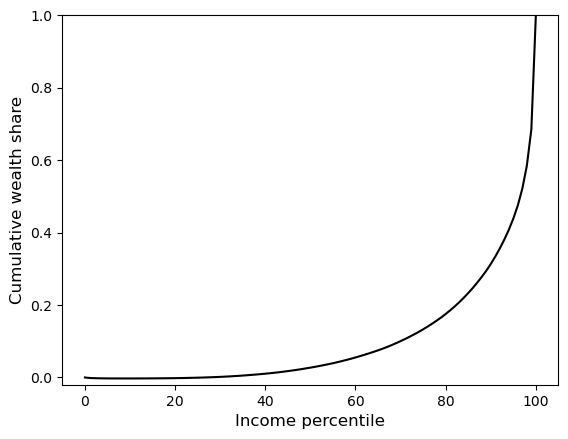

Estimate is center=0.730635182685901, spread=0.29687809399130544
Lorenz distance is 4.164275595911819
Average MPC for all consumers is 0.949
Average MPC in the top percentile of W/Y is 0.591
Average MPC in the top decile of W/Y is 0.729
Average MPC in the top quintile of W/Y is 0.804
Average MPC in the second quintile of W/Y is 0.953
Average MPC in the middle quintile of W/Y is 0.988
Average MPC in the fourth quintile of W/Y is 1.000
Average MPC in the bottom quintile of W/Y is 1.000
Average MPC in the top percentile of y is 0.940
Average MPC in the top decile of y is 0.936
Average MPC in the top quintile of y is 0.936
Average MPC in the second quintile of y is 0.943
Average MPC in the middle quintile of y is 0.950
Average MPC in the fourth quintile of y is 0.951
Average MPC in the bottom quintile of y is 0.966
Average MPC for the employed is 0.946
Average MPC for the unemployed is 0.997
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
nan% are in the b

In [10]:
EstimationEconomy_bounds = estimate_r_upper_given_r_lower(options, parameters)

In [11]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = np.asarray(EstimationEconomy_bounds.reap_state["aLvl"]).flatten()
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

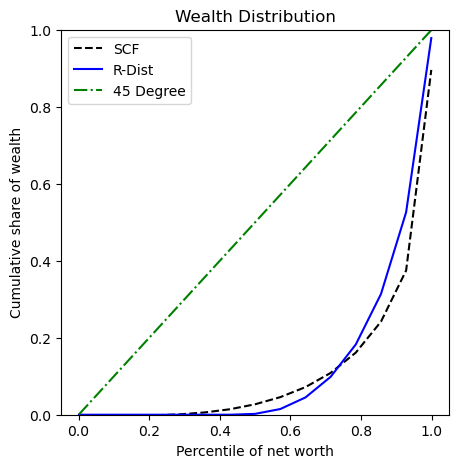

In [12]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")